<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Animes_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Análise de Dados</b></h1>

In [1]:
# Versão Python
from platform import python_version
print("Versão Python Para Este Projeto:", python_version())

Versão Python Para Este Projeto: 3.10.9


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.7.0
numpy     : 1.23.5



<h3><b>Carregando o Conjunto de Dados</b><h3>

In [50]:
df = pd.read_csv("dataset/animesv2.csv")

In [51]:
df.head()

,name,ranked,genre,theme,status,episodes,duration,start_date,end_date,favorites
0,"""Oshi no Ko""",1,Drama,Reincarnation,Currently,11.0,Unknown,Apr;12;2023,?;,7.523
1,Fullmetal Alchemist: Brotherhood,2,Action,NaN,Finished,64.0,24,Apr;12;2023,Jul;4;2010,215.444
2,Shingeki no Kyojin: The Final Season - Kankets...,3,Action,Gore,Currently,2.0,1,Apr;12;2023,202;3,7.949
3,Steins;Gate,4,Drama,Psychological,Finished,24.0,24,Apr;12;2023,Sep;14;2011,181.179
4,Bleach: Sennen Kessen-hen,5,Action,NaN,Finished,13.0,24,Apr;12;2023,Dec;27;2022,16.916


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        500 non-null    object 
 1   ranked      500 non-null    int64  
 2   genre       402 non-null    object 
 3   theme       273 non-null    object 
 4   status      500 non-null    object 
 5   episodes    495 non-null    float64
 6   duration    500 non-null    object 
 7   start_date  500 non-null    object 
 8   end_date    500 non-null    object 
 9   favorites   500 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 39.2+ KB


In [53]:
df.shape

(500, 10)

<h3><b>Verificando Valores Ausentes</b></h3>

In [54]:
missing_values = df.isna().sum() / len(df) * 100

In [55]:
# Valores ausentes por percentual
missing_values

name           0.0
ranked         0.0
genre         19.6
theme         45.4
status         0.0
episodes       1.0
duration       0.0
start_date     0.0
end_date       0.0
favorites      0.0
dtype: float64

In [56]:
# Lista de colunas a serem exibidas no gráfico
columns = ["genre", "theme"]

In [57]:
# Função que retorna valores ausentes passando o dataframe e o nome da coluna como parâmetros
def nan_values(df, column):
    return df[column].isna().sum()

In [58]:
# Valores ausentes por quantidade
for col in df:
    print(f"{col}: {nan_values(df, col)} valores ausentes")

name: 0 valores ausentes
ranked: 0 valores ausentes
genre: 98 valores ausentes
theme: 227 valores ausentes
status: 0 valores ausentes
episodes: 5 valores ausentes
duration: 0 valores ausentes
start_date: 0 valores ausentes
end_date: 0 valores ausentes
favorites: 0 valores ausentes


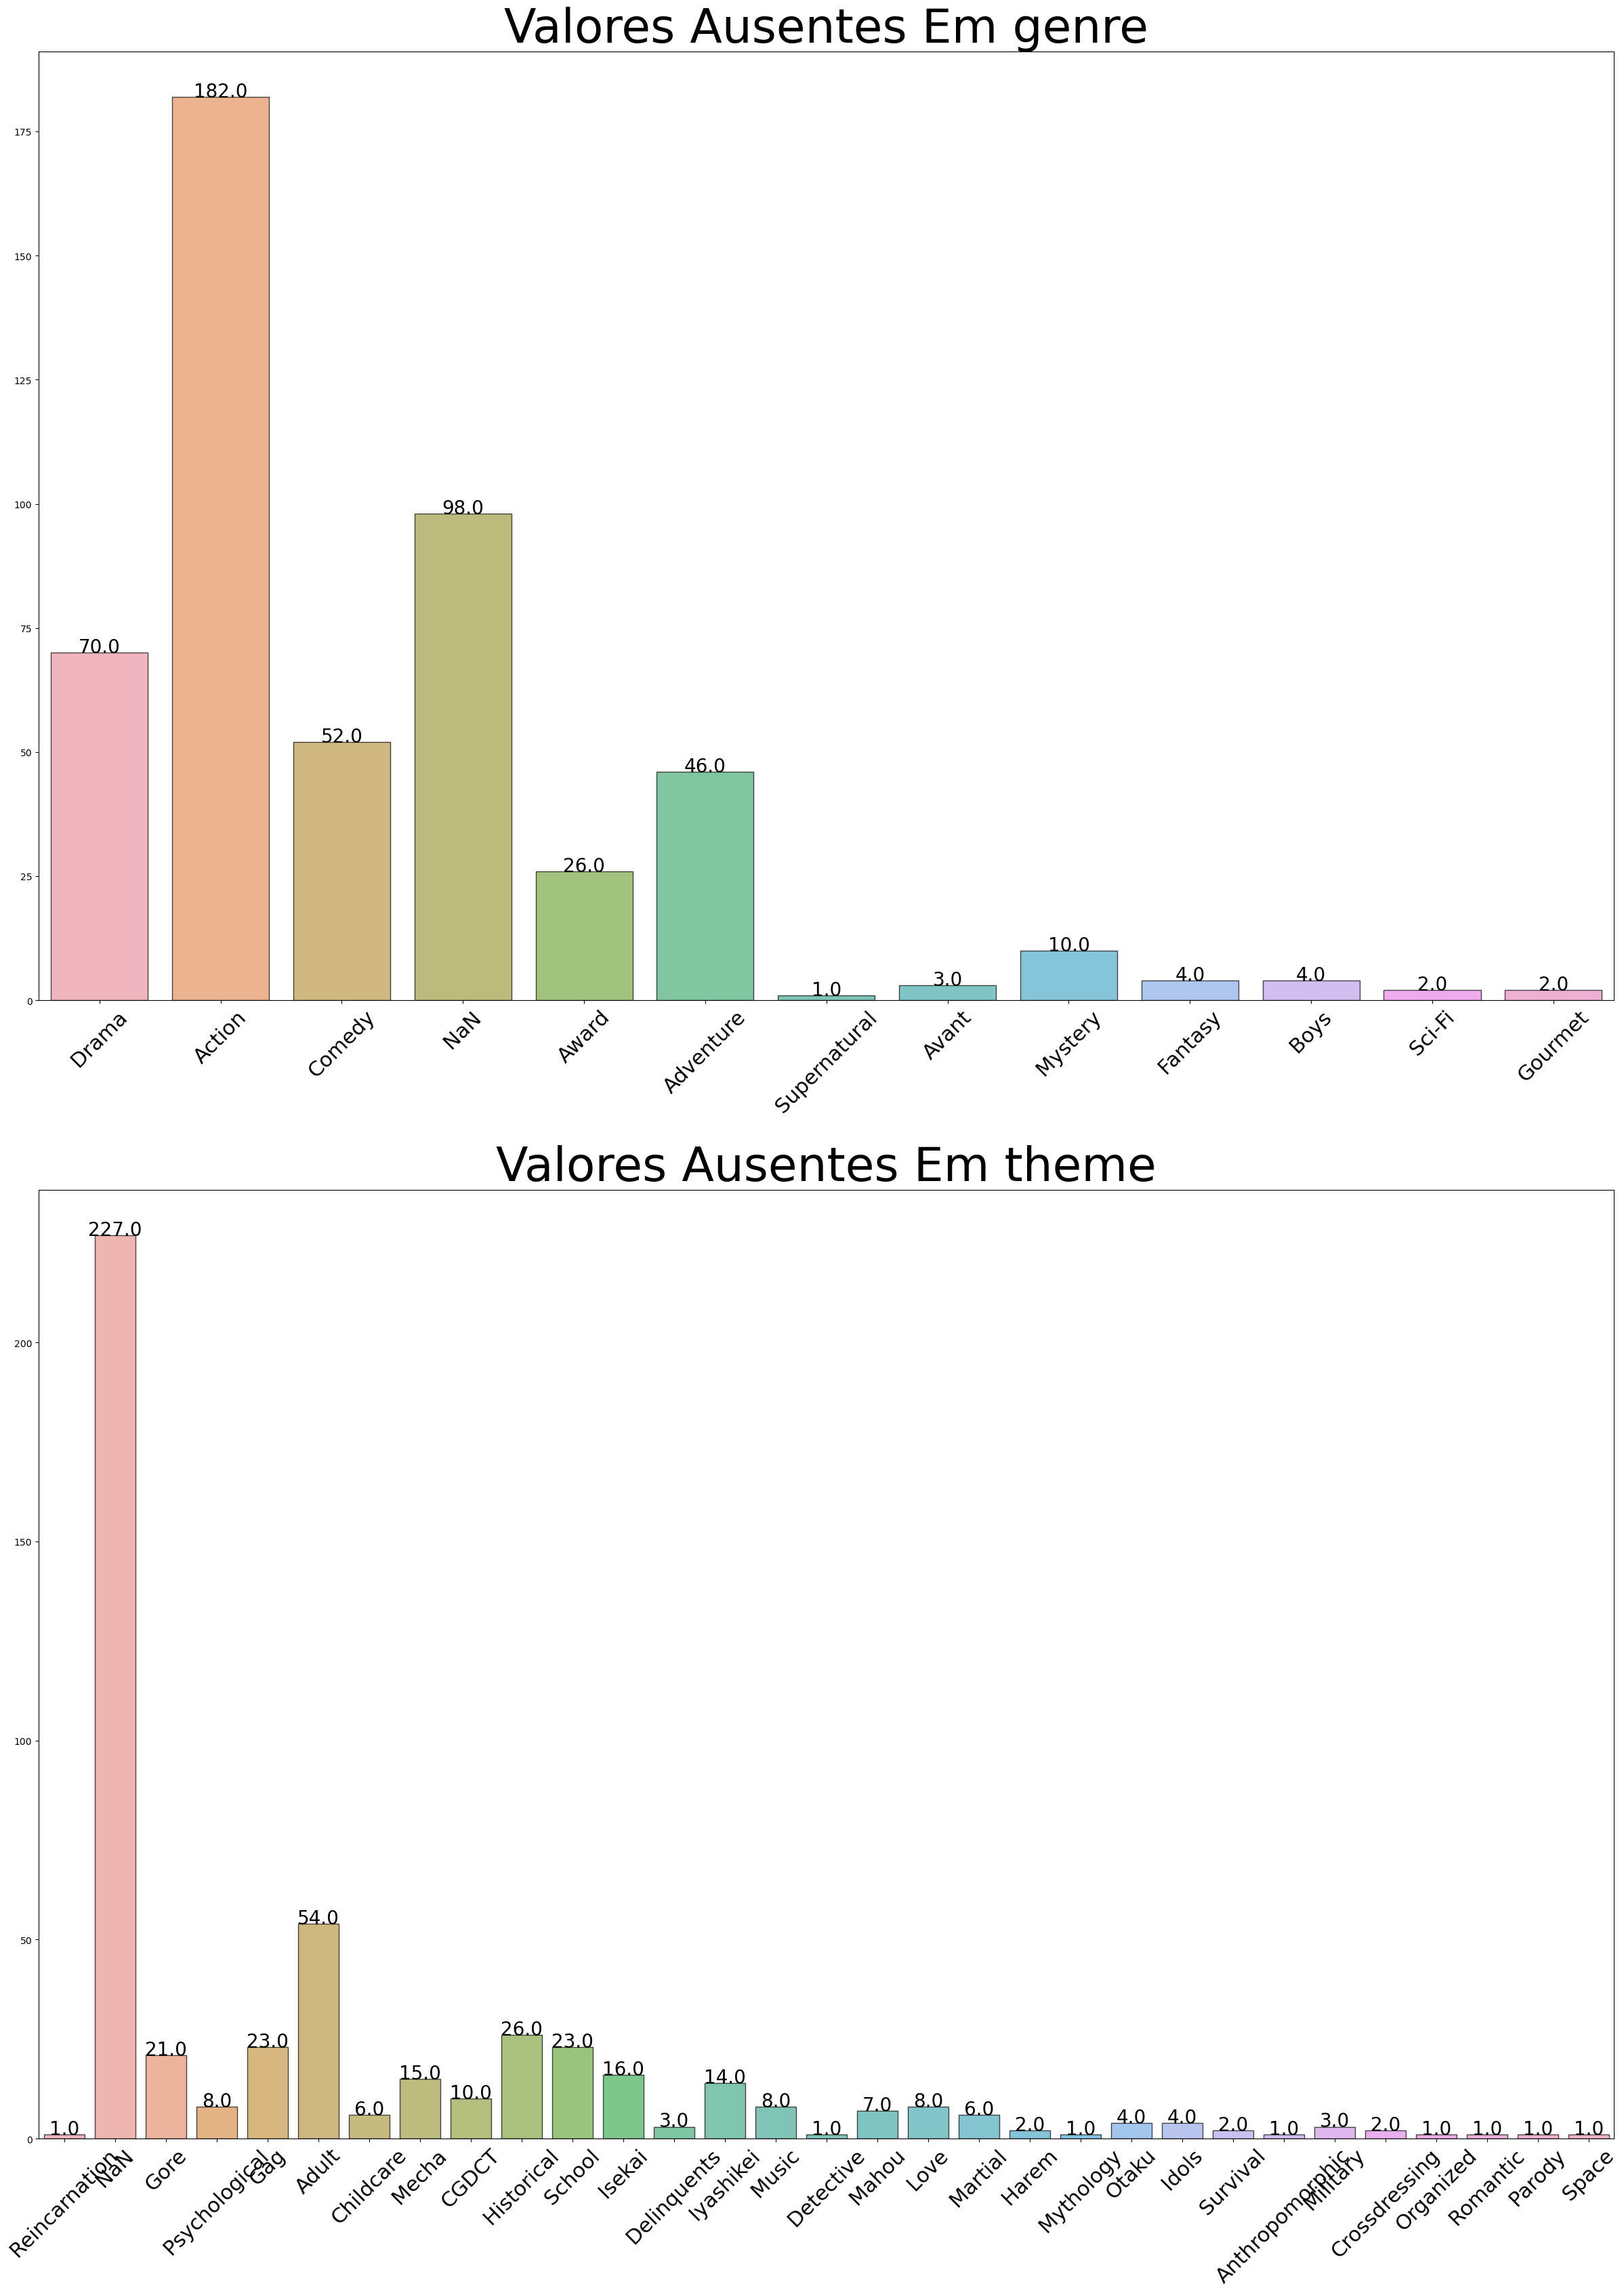

In [59]:
# Figura
plt.figure(figsize=(30, 40))

# Contador
A = 0
for col in columns:
    A += 1
    plt.subplot(2, 1, A)
    # Título
    plt.title(f"Valores Ausentes Em {col}", fontdict={"size": 50})

    # Gráfico
    ax = sns.countplot(data=df.fillna("NaN"), x=col, alpha=0.7, edgecolor="black")
    plt.xticks(rotation=45, size=22, labels=None)
    plt.yticks(labels=None)
    ax.set_xlabel("")
    ax.set_ylabel("")
    # Rótulo de dados
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x()+0.4, p.get_height()),
                   color="black", ha="center", size=20)

# Show
plt.show()

<p>A variável <b>theme</b> é que mais possui valores ausentes, seguida da variável <b>end_date</b> que por sinal faz sentido ter valores ausentes para animes que <b>ainda estão em exibição</b>, logo não existe uma data de encerramento, não analisamos graficamente as variáveis <b>episodes</b> e <b>end_date</b> pois elas contém muita informação e o grafico ficaria poluído demais.</p>

<h1><b>Qual foi o anime mais favoritado?</b></h1>

In [60]:
df.loc[df["favorites"].argmax()]

name          Initial D Second Stage
ranked                           396
genre                         Action
theme                            NaN
status                      Finished
episodes                        13.0
duration                          23
start_date               Apr;12;2023
end_date                 Jan;21;2000
favorites                      978.0
Name: 394, dtype: object

<p>O anime mais favoritado foi Initial D Second Stage classificado no Rank 396 com nada menos que 978.00 favoritações.</p>

<h1><b>Quais os Gêneros de Animes?</b></h1>

In [61]:
df["genre"].value_counts()

Action          182
Drama            70
Comedy           52
Adventure        46
Award            26
Mystery          10
Fantasy           4
Boys              4
Avant             3
Sci-Fi            2
Gourmet           2
Supernatural      1
Name: genre, dtype: int64

<p>Nosso Top 3 de gêneros são:</p>
<ul>
    <li> Action: 182</li>
    <li> Drama: 70</li>
    <li> Comedy: 52</li>
</ul>
<p> Temos muito mais animes do tipo Action, oque significa que tendem a ser mais populares dentre os demais generos? </p>

In [62]:
# Verificando os animes do tipo Action que já foram encerrados
df.loc[(df["genre"] == "Action") & (df["status"] == "Finished")]

,name,ranked,genre,theme,status,episodes,duration,start_date,end_date,favorites
1,Fullmetal Alchemist: Brotherhood,2,Action,NaN,Finished,64.0,24,Apr;12;2023,Jul;4;2010,215.444
4,Bleach: Sennen Kessen-hen,5,Action,NaN,Finished,13.0,24,Apr;12;2023,Dec;27;2022,16.916
5,Gintama°,6,Action,Gag,Finished,51.0,24,Apr;12;2023,Mar;30;2016,15.714
7,Shingeki no Kyojin Season 3 Part 2,8,Action,Gore,Finished,10.0,23,Apr;12;2023,Jul;1;2019,54.695
8,Gintama: The Final,9,Action,Gag,Finished,1.0,1,Apr;12;2023,;,4.006
...,...,...,...,...,...,...,...,...,...,...
487,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,488,Action,Historical,Finished,1.0,32,Apr;12;2023,;,71.000
491,Kidou Senshi Gundam 00 Second Season,492,Action,Mecha,Finished,25.0,24,Apr;12;2023,Mar;29;2009,1.354
496,Koukaku Kidoutai: Stand Alone Complex - The La...,497,Action,Adult,Finished,1.0,2,Apr;12;2023,;,55.000
498,Kuroshitsuji: Book of Circus,499,Action,Historical,Finished,10.0,24,Apr;12;2023,Sep;12;2014,3.482


In [63]:
# Localizando a variável "genre" que seja "Action" e tenha sido encerrado
df.loc[(df["genre"] == "Action") & (df["status"] == "Finished")].groupby(by="status").count()

,name,ranked,genre,theme,episodes,duration,start_date,end_date,favorites
status,,,,,,,,,
Finished,176,176,176,96,176,176,176,176,176


In [64]:
# Verificando os gêneros com agregação da variável "status"
df.groupby(["genre"])["status"].count()

genre
Action          182
Adventure        46
Avant             3
Award            26
Boys              4
Comedy           52
Drama            70
Fantasy           4
Gourmet           2
Mystery          10
Sci-Fi            2
Supernatural      1
Name: status, dtype: int64

<h1><b>Conclusão:</b></h1>
<p>Mesmo após o seu encerramento, os animes do gênero Action continuam sendo os animes mais populares dentre os gêneros.</p>

<h1><b>Quantos animes ja foram encerrados e quantos ainda estão em exibição?</b></h1>

In [65]:
df["status"].value_counts()

Finished     489
Currently     11
Name: status, dtype: int64

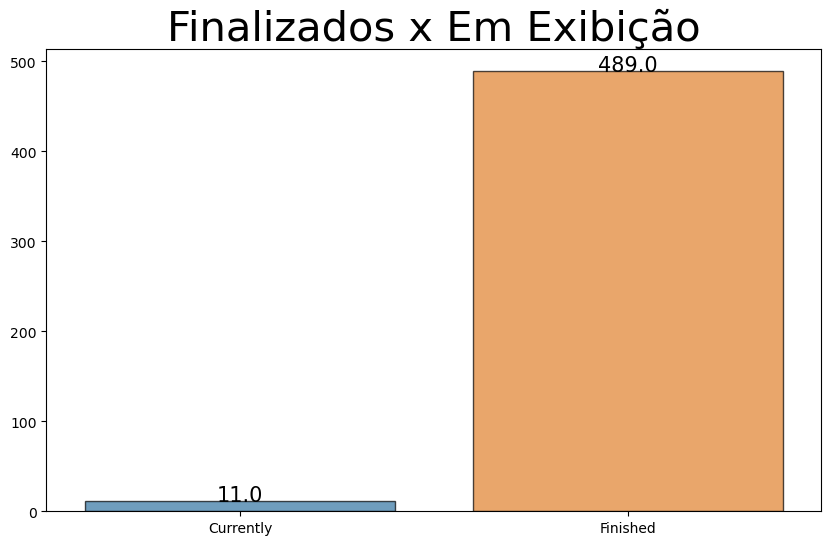

In [66]:
# Figura
plt.figure(figsize=(10, 6))

# Gráfico
ax = sns.countplot(data=df, x="status", alpha=0.7, edgecolor="black")

# Título
plt.title("Finalizados x Em Exibição", fontdict={"size": 30})

# Removendo os títulos dos eixos X Y
ax.set_ylabel("")
ax.set_xlabel("")

# Rótulo de dados
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x()+0.4, p.get_height()),
               color="black", size=15, ha="center")
    
# Show
plt.show()

<p>Apesar de termos 500 registros de animes, existem milhares por ai, é muito interessante descobrir que do top 500 quase 100% dos animes ja foram encerrados e continuam no ranking, vamos verificar quais desses animes foram encerrados recentemente.</p>

In [ ]:
# Localizando as linhas onde "status" seja igual à "Finished" e agrupando pela variável "end_date"
finished = df.loc[df["status"] == "Finished"].groupby("end_date").apply(lambda x: x[["end_date"]]).reset_index(drop=True)

In [42]:
# Agora vamos filtrar somente o ano de cada anime
total = []
for col in finished["end_date"]:
        total.append(col[-4::])

In [43]:
# Transformando a lista em uma Series 
year = pd.Series(total)

In [44]:
# Contando os valores
year.value_counts()

;       158
2021     29
2022     29
2014     20
2017     19
2016     19
2019     19
2018     19
2015     17
2020     16
2010     14
2012     14
2008     13
2013     12
2009     11
2011     11
2007     11
2023      9
2006      8
1998      6
2005      6
2003      5
2000      3
2004      3
1996      3
1999      2
2002      2
1997      2
1995      2
1988      1
1991      1
1981      1
1971      1
1980      1
2001      1
1978      1
dtype: int64

<p>Oque podemos verificar é que a maioria dos registros está incompleta, vamos verificar mais afundo.</p>

In [45]:
# Verificando o tamanho da linha da variável "end_date"
size = finished["end_date"].apply(lambda x: len(x))

In [46]:
# Size
size.value_counts()

11    286
1     158
10     45
Name: end_date, dtype: int64

<h1><b>Conclusão</b></h1>
<p> Dos 489 registros 158 estão com ausência de informação, portanto não podemos levar em consideração todos os registros, no entanto, podemos observar que todos os animes foram encerrados à pelo menos 1 ano atrás, oque significa que mesmo após o seu termino ainda continuam populares.</p>